
# Linear Regression Project

Problem statement:

You've contracted with an e-commerce company based in the United States and selling online clothing, but the store also has in-store style and clothing advice sessions.Customers can go into the store, hold sessions or meetings with a personal stylist, and then go home and order their desired outfits via the mobile app or website.

The company is trying to decide whether to focus its efforts on mobile app experiences or website experiences.
And they’ve hired you under contract to help them understand. And then you can go ahead and get started just by analyzing customer data.Lets start!

To analyze customer data, simply follow the steps below (this dataset is fake, don't worry, I didn't give you real credit card numbers or emails).

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We will work with the E-commerce Client Csv file in the company. It has Customer information such as e-mail, address and their colorful membership picture. It then also has numeric value columns:

* mean_session_length: Average session of in-store style recommendation sessions.
* time_spent_app: Average time spent on the application in minutes
* time_spent_website: Average time spent on the website in minutes
* length_of_membership: How many years the customer has been a member.

**Read the e-commerce client csv file as DataFrame called customers.**

In [38]:
customers = pd.read_csv("ecommerce_client.csv")

**Check the head of customers, and check out its info() and describe() methods.**

In [39]:
customers.head()

,e-mail,address,membership_image,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
0,jessica04@christian-riley.com,"338 Graham Loaf Suite 236\nEast Toddton, FM 43...",LemonChiffon,34.497268,12.655651,39.577668,4.082621,587.951054
1,simmonsmartin@hardy.com,"2302 Joshua Park\nMillerbury, WA 30239-8144",MediumVioletRed,31.926272,11.109461,37.268959,2.664034,392.204933
2,michellejohnson@sanders-rodriguez.com,"70562 Gonzalez Stravenue\nElizabethland, WI 40...",Teal,33.000915,11.330278,37.110597,4.104543,487.547505
3,tylerhernandez@barton.info,"7613 Miguel Knoll Suite 762\nWest Katherine, W...",SlateGray,34.305557,13.717514,36.721283,3.120179,581.852344
4,connerjoseph@gmail.com,"981 David Square\nNew Jacquelinetown, AK 66018...",Turquoise,33.330673,12.795189,37.536653,4.446308,599.406092


In [40]:
customers.describe()

,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [41]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   e-mail                500 non-null    object 
 1   address               500 non-null    object 
 2   membership_image      500 non-null    object 
 3   mean_session_length   500 non-null    float64
 4   time_spent_app        500 non-null    float64
 5   time_spent_website    500 non-null    float64
 6   length_of_membership  500 non-null    float64
 7   annual_amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


## Exploratory Data Analysis

**Let's examine the data!**

For the remainder of the exercise we will only use the numerical data of the csv file.
___

**Use seaborn to create a joint plan to compare the Time Spent on Website and Annual Amount columns. Does the correlation make sense?**

In [42]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

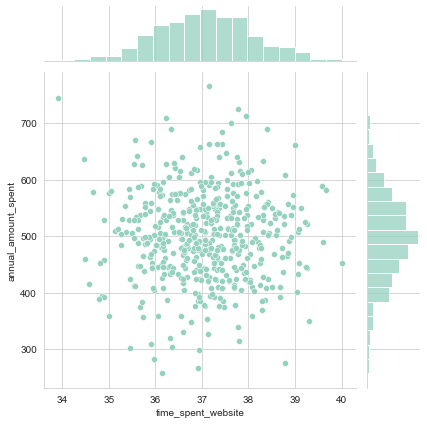

In [43]:
#More time on site, more money spent
sns.jointplot(x='time_spent_website', y='annual_amount_spent', data=customers)

**Do the same but with the Time on App column instead.**

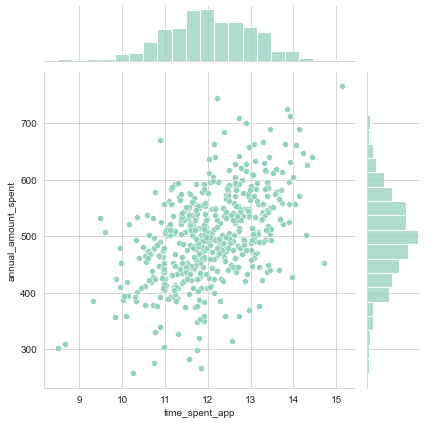

In [44]:
sns.jointplot(x='time_spent_app', y='annual_amount_spent', data=customers)

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

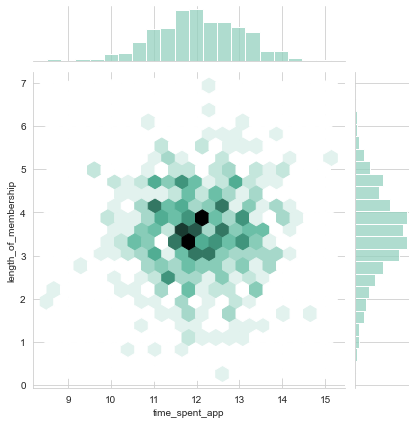

In [45]:
sns.jointplot(x='time_spent_app',y='length_of_membership', kind='hex', data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

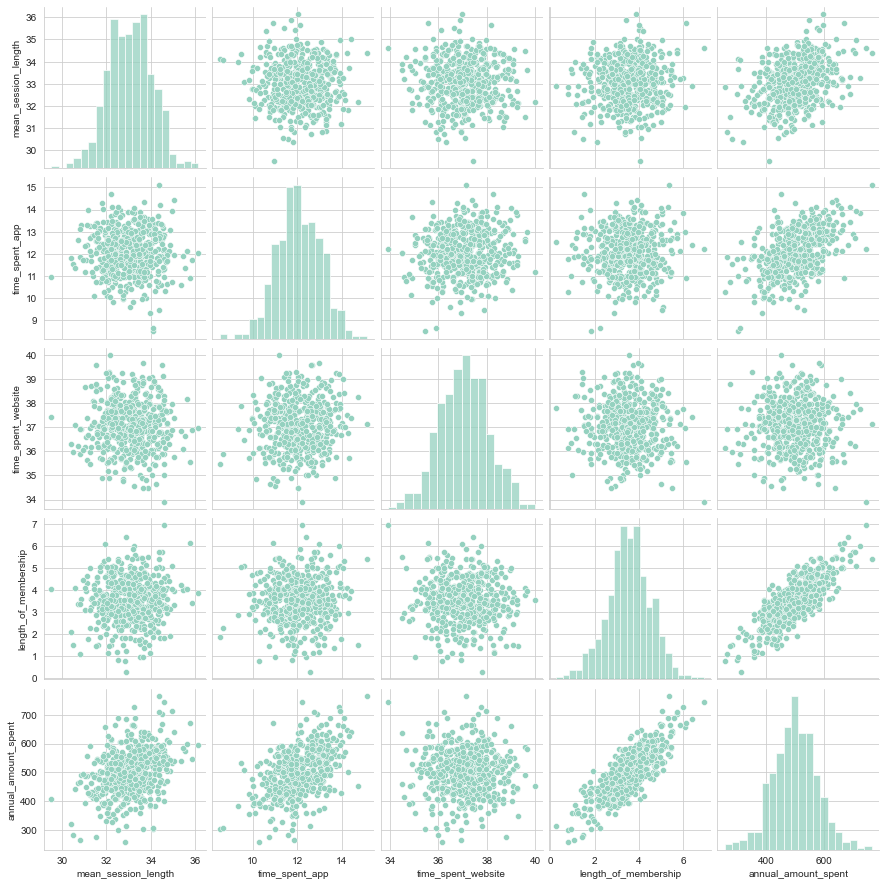

In [46]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Annual Amount Spent?**

In [47]:
# Length of Membership 

**Create a linear model plot (using seaborn's lmplot) of  Annual Amount Spent vs. Length of Membership.**

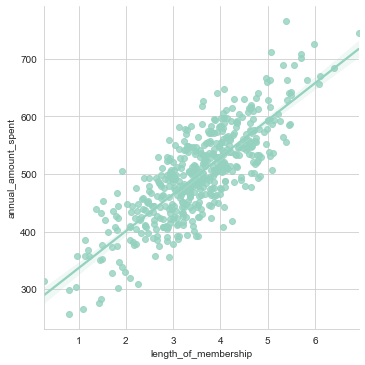

In [48]:
sns.lmplot(x='length_of_membership', y='annual_amount_spent', data=customers)

## Training and Testing Data

Now that we've researched the data a bit, let's go ahead and split the data into training and test sets.
**Set an X variable equal to the numerical specifications of customers and a variable y equal to the "Annual Amount Spent" column.**

In [49]:
x= customers[['mean_session_length', 'time_spent_app', 'time_spent_website', 'length_of_membership']]

In [50]:
y=customers['annual_amount_spent']

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [53]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [54]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [55]:
lm.fit(x_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [56]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [57]:
predictions = lm.predict(x_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

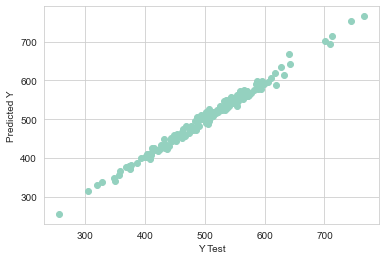

In [58]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [59]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  7.228148653430817
MSE:  79.81305165097429
RMSE:  8.933815066978624


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_amount_spent', ylabel='Density'>

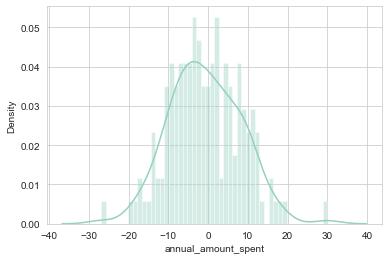

In [62]:
sns.distplot((y_test-predictions), bins=50)

In [64]:
metrics.explained_variance_score(y_test, predictions)   #variance

0.9890771231889607

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [63]:
coeffecients = pd.DataFrame(lm.coef_, x.columns)
coeffecients.columns = ['Coeffecient'] 
coeffecients

,Coeffecient
mean_session_length,25.981550
time_spent_app,38.590159
time_spent_website,0.190405
length_of_membership,61.279097


**How can you interpret these coefficients?**

*Answer here* 

Interpreting the coefficients:

1)Holding all other features fixed, a 1 unit increase in mean_session_length is associated with an increase of 25.98 total     dollars spent.

2)Holding all other features fixed, a 1 unit increase in time_spent_app is associated with an increase of 38.59 total dollars spent.

3)Holding all other features fixed, a 1 unit increase in time_spent_website is associated with an increase of 0.19 total dollars spent.

4)Holding all other features fixed, a 1 unit increase in length_of_membership is associated with an increase of 61.27 total dollars spent.

**Do you think the company should focus more on their mobile app or on their website?**

*Answer here*

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.

Thank you 